RBI Strategy - Introduced by Oliver Velez, Perfected by Akbar Pathan

Importing necessary libraries

In [53]:
import yfinance as yf
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter
import os

Downloading 2min price data of SPY & all tickers in the S&P500

In [36]:
# Define the list of tickers for the selected equities
tickers = ['SPY', 'CRWD', 'NVDA', 'HD']

# Initialize an empty dictionary to store the data
data = {}

# Retrieve 2-minute interval data for the past 60 days
start_date = (datetime.datetime.now() - datetime.timedelta(days=59)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

for ticker in tickers:
    print(f"Fetching data for {ticker}")
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date, interval='2m')
        data[ticker] = stock_data
        
        # Save each stock's data into a separate CSV file
        stock_data.to_csv(f"{ticker}_2min_data.csv")
        
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")

print("Data retrieval and saving complete!")

Fetching data for SPY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for CRWD
Fetching data for NVDA
Fetching data for HD
Data retrieval and saving complete!


In [54]:
# Define the list of tickers for the selected equities
tickers = ['SPY', 'CRWD', 'NVDA', 'HD']

# Initialize an empty dictionary to store the data
data = {}

# Retrieve 2-minute interval data for the past 60 days
start_date = (datetime.datetime.now() - datetime.timedelta(days=59)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

for ticker in tickers:
    print(f"Fetching data for {ticker}")
    try:
        # Create a directory for the ticker if it doesn't already exist
        ticker_folder = os.path.join(os.getcwd(), ticker)
        if not os.path.exists(ticker_folder):
            os.makedirs(ticker_folder)
        
        # Fetch the 2-minute interval data
        stock_data = yf.download(ticker, start=start_date, end=end_date, interval='2m')
        data[ticker] = stock_data
        
        # Save the stock data into a CSV file inside the respective ticker's folder
        stock_data.to_csv(os.path.join(ticker_folder, f"{ticker}_2min_data.csv"))
        
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")

print("Data retrieval and saving complete!")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for SPY
Fetching data for CRWD
Fetching data for NVDA



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for HD
Data retrieval and saving complete!


Adding 20min & 200min SMA data to each 2min Data file

In [47]:
# Load the previously saved CRWD data
crwd_data = pd.read_csv("CRWD_2min_data.csv", index_col=0, parse_dates=True)

# Check the first few rows of the data to ensure it loaded correctly
print("Initial data check:")
print(crwd_data.head())

# Calculate the 20-minute and 200-minute SMAs
crwd_data['20min_SMA'] = crwd_data['Close'].rolling(window=10).mean()  # 20min SMA on a 2min interval is a 10-period SMA
crwd_data['200min_SMA'] = crwd_data['Close'].rolling(window=100).mean()  # 200min SMA on a 2min interval is a 100-period SMA

# Check if the SMA columns are populated correctly
if crwd_data['20min_SMA'].isnull().all() or crwd_data['200min_SMA'].isnull().all():
    print("Error: SMA columns are not populated correctly. Please check the calculations.")
else:
    print("SMA columns populated successfully. Sample data:")
    print(crwd_data[['20min_SMA', '200min_SMA']].dropna().head())

# Save the updated data with SMAs to the same CSV file
crwd_data.to_csv("CRWD_2min_data.csv")

print("Process completed successfully! 20min & 200min SMA data added to CSV file!")

Initial data check:
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-07-15 09:30:00-04:00  372.269989  372.299988  369.510010  370.089996   
2024-07-15 09:32:00-04:00  370.084991  370.084991  367.765015  368.000000   
2024-07-15 09:34:00-04:00  367.940002  367.940002  364.209991  366.380005   
2024-07-15 09:36:00-04:00  365.989990  368.500000  365.895996  368.459991   
2024-07-15 09:38:00-04:00  368.579987  372.489899  368.579987  372.191101   

                            Adj Close  Volume  
Datetime                                       
2024-07-15 09:30:00-04:00  370.089996  112751  
2024-07-15 09:32:00-04:00  368.000000   20365  
2024-07-15 09:34:00-04:00  366.380005  135513  
2024-07-15 09:36:00-04:00  368.459991   80392  
2024-07-15 09:38:00-04:00  372.191101   58716  
SMA columns populated successfully. Sample data:
                            20min_SMA  200min_SMA
Datet

Adding column to check if setup for the strategy (Picture of Power) is 'activated' at each time

In [48]:
# Load the previously saved CRWD data (with the SMAs already calculated and saved in the previous step)
crwd_data = pd.read_csv("CRWD_2min_data.csv", index_col=0, parse_dates=True)

# Now add the Setup condition
crwd_data['Setup'] = crwd_data['20min_SMA'] > crwd_data['200min_SMA']

# Save the updated data with the Setup column to the same CSV file
crwd_data.to_csv("CRWD_2min_data.csv")

# Re-load the final file to confirm everything saved correctly
final_data = pd.read_csv("CRWD_2min_data.csv", index_col=0, parse_dates=True)

# Check if the SMA and Setup columns are populated in the final CSV
if final_data[['20min_SMA', '200min_SMA', 'Setup']].isnull().all().any():
    print("Error: One or more columns (SMA, Setup) are not populated correctly in the final CSV.")
else:
    print("Final CSV file saved correctly. Sample data:")
    print(final_data[['20min_SMA', '200min_SMA', 'Setup']].dropna().head())

print("Process completed successfully! First portion of setup with identifying Picture of Power is complete!")


Final CSV file saved correctly. Sample data:
                            20min_SMA  200min_SMA  Setup
Datetime                                                
2024-07-15 12:48:00-04:00  377.356198  378.684351  False
2024-07-15 12:50:00-04:00  377.532697  378.760251  False
2024-07-15 12:52:00-04:00  377.660696  378.857701  False
2024-07-15 12:54:00-04:00  377.714557  378.968901  False
2024-07-15 12:56:00-04:00  377.739047  379.061801  False
Process completed successfully! First portion of setup with identifying Picture of Power is complete!


Identifying & Labeling each candlestick appropriately

In [49]:
# Load the CRWD data with SMAs and Setup
crwd_data = pd.read_csv("CRWD_2min_data.csv", index_col=0, parse_dates=True)

# Initialize all bars as "Noise Bar" by default
crwd_data['Label'] = "Noise Bar"

# Identify Control Bars
crwd_data.loc[(crwd_data['Close'] > crwd_data['Open']) & (crwd_data['Setup'] == True), 'Label'] = "Control Bar"

# Iterate through the DataFrame to label Ignored Bars and Indicator Bars
for i in range(1, len(crwd_data) - 1):
    if crwd_data.iloc[i]['Label'] == "Control Bar":
        # We have identified a Control Bar; now check subsequent bars

        # Check for Ignored Bar A
        if (crwd_data.iloc[i + 1]['Close'] < crwd_data.iloc[i + 1]['Open']) and \
           ((crwd_data.iloc[i + 1]['Open'] - crwd_data.iloc[i + 1]['Close']) <= 0.5 * (crwd_data.iloc[i]['Close'] - crwd_data.iloc[i]['Open'])):
            crwd_data.iloc[i + 1, crwd_data.columns.get_loc('Label')] = "Ignored Bar A"

            # Check for Ignored Bar B
            if (i + 2 < len(crwd_data)) and \
               (crwd_data.iloc[i + 2]['Close'] < crwd_data.iloc[i + 2]['Open']) and \
               ((crwd_data.iloc[i + 2]['Open'] - crwd_data.iloc[i + 2]['Close']) <= 0.5 * (crwd_data.iloc[i]['Close'] - crwd_data.iloc[i]['Open'])):
                crwd_data.iloc[i + 2, crwd_data.columns.get_loc('Label')] = "Ignored Bar B"
                next_index = i + 2
            else:
                next_index = i + 1
            
            # Check for Indicator Bar
            if (next_index + 1 < len(crwd_data)) and \
               (crwd_data.iloc[next_index + 1]['Close'] > crwd_data.iloc[next_index + 1]['Open']) and \
               (crwd_data.iloc[next_index + 1]['High'] > crwd_data.iloc[next_index]['High']):
                crwd_data.iloc[next_index + 1, crwd_data.columns.get_loc('Label')] = "Indicator Bar"

# Final Review: Relabel any "Control Bar" that is not followed by an "Ignored Bar" as a "Noise Bar"
for i in range(len(crwd_data) - 1):
    if crwd_data.iloc[i]['Label'] == "Control Bar":
        if crwd_data.iloc[i + 1]['Label'] not in ["Ignored Bar A", "Ignored Bar B"]:
            crwd_data.iloc[i, crwd_data.columns.get_loc('Label')] = "Noise Bar"

# Save the labeled data to the same CSV file
crwd_data.to_csv("CRWD_2min_data.csv")

print("Candlestick labeling completed and saved successfully!")


Candlestick labeling completed and saved successfully!


Checking if 20min SMA is 'close' to the current price & if 20min SMA's slope is positive. This piece of code also identitifes each point at which the data is ready for a trade.

In [50]:
# Load the CRWD data with final labels
crwd_data = pd.read_csv("CRWD_2min_data.csv", index_col=0, parse_dates=True)

# Calculate the slope (first derivative) of the 20-minute SMA
crwd_data['SMA_20_slope'] = crwd_data['20min_SMA'].diff()

# Initialize all bars as "Empty"
crwd_data['Trade_Status'] = "Empty"

# Check the conditions after identifying Ignored Bars
for i in range(len(crwd_data) - 1):
    if crwd_data.iloc[i]['Label'] in ["Ignored Bar A", "Ignored Bar B"]:
        # Condition 1: Check if the closing price is within $1.00 of the 20-minute SMA
        proximity_condition = abs(crwd_data.iloc[i]['Close'] - crwd_data.iloc[i]['20min_SMA']) <= 1.00
        
        # Condition 2: Check if the slope of the 20-minute SMA is positive
        slope_condition = crwd_data.iloc[i]['SMA_20_slope'] > 0
        
        # If both conditions are true, label the bar as "Primed"
        if proximity_condition and slope_condition:
            crwd_data.iloc[i, crwd_data.columns.get_loc('Trade_Status')] = "Primed"

# Save the updated data with the Trade_Status column to the same CSV file
crwd_data.to_csv("CRWD_2min_data.csv")

print("Proximity and slope checks completed, and labels applied successfully!")

Proximity and slope checks completed, and labels applied successfully!


Cleaning all data by rounding values

In [51]:
# Load the data from CRWD_2min_data.csv
crwd_data = pd.read_csv("CRWD_2min_data.csv", index_col=0, parse_dates=True)

# Round all numerical values to the nearest thousandth and format to three decimal places
for column in crwd_data.select_dtypes(include=['float64', 'int64']).columns:
    crwd_data[column] = crwd_data[column].round(3).apply(lambda x: f"{x:.3f}")

# Save the cleaned-up data back to the same CSV file
crwd_data.to_csv("CRWD_2min_data.csv")

print("CRWD_2min_data.csv has been cleaned and saved successfully.")

CRWD_2min_data.csv has been cleaned and saved successfully.


Executing trades and saving data to Ticker's Trade Log

In [42]:
# Load the CRWD data with the latest labels
crwd_data = pd.read_csv("CRWD_2min_data.csv", index_col=0, parse_dates=True)

# Initialize a DataFrame to record trades
trade_log = pd.DataFrame(columns=["Entry_Time", "Action_Price", "Stop_Loss", "Trade_Type", "Trade_ID"])

# Create a list to track active positions with Trade IDs
active_positions = []

# Function to find the most recent Ignored Bar and calculate the stop loss
def calculate_stop_loss(index):
    recent_ignored_bar_index = index - 1
    while recent_ignored_bar_index >= 0 and crwd_data.iloc[recent_ignored_bar_index]['Label'] not in ["Ignored Bar A", "Ignored Bar B"]:
        recent_ignored_bar_index -= 1
    stop_loss = crwd_data.iloc[recent_ignored_bar_index]['Low'] - 0.01
    return stop_loss

# Unique Trade ID generator
trade_id_counter = 1

# Iterate through the DataFrame to identify and execute trades
for i in range(1, len(crwd_data) - 1):
    current_open = crwd_data.iloc[i]['Open']
    current_high = crwd_data.iloc[i]['High']
    current_low = crwd_data.iloc[i]['Low']
    current_close = crwd_data.iloc[i]['Close']
    current_sma = crwd_data.iloc[i]['20min_SMA']
    
    # Check for each active position
    for position in active_positions[:]:  # Use a copy of the list to modify it during iteration
        entry_time, entry_price, stop_loss, trade_type, trade_id = position
        
        # Check for stop loss first, by comparing the low price
        if current_low <= stop_loss:
            action_price = stop_loss  # Sell at the stop loss price
            # Log the sell due to stop loss
            trade_log = pd.concat([trade_log, pd.DataFrame({
                "Entry_Time": [crwd_data.index[i]],
                "Action_Price": [action_price],
                "Stop_Loss": [stop_loss],
                "Trade_Type": ["Sell - Stop Loss"],
                "Trade_ID": [trade_id]
            })], ignore_index=True)
            
            # Remove the position from active_positions
            active_positions.remove(position)
            print(f"Position with Trade ID {trade_id} closed due to stop loss at {crwd_data.index[i]}: Sell Price = {action_price}")
        
        else:
            # Now check for SMA divergence
            sma_diff = current_sma - current_close
            
            if sma_diff > 0:  # SMA is above the current price (positive difference)
                prices_to_check = [current_low, current_close, current_open, current_high]
            else:  # SMA is below the current price (negative difference)
                prices_to_check = [current_high, current_open, current_close, current_low]
            
            # Find the first price that diverges more than the threshold
            for price in prices_to_check:
                if abs(price - current_sma) >= 1.00:
                    action_price = price
                    # Log the sell due to SMA divergence
                    trade_log = pd.concat([trade_log, pd.DataFrame({
                        "Entry_Time": [crwd_data.index[i]],
                        "Action_Price": [action_price],
                        "Stop_Loss": [stop_loss],
                        "Trade_Type": ["Sell - Away from SMA"],
                        "Trade_ID": [trade_id]
                    })], ignore_index=True)
                    
                    # Remove the position from active_positions
                    active_positions.remove(position)
                    print(f"Position with Trade ID {trade_id} closed due to SMA divergence at {crwd_data.index[i]}: Sell Price = {action_price}")
                    break  # Exit the loop once a price meets the condition

    # Check if a new position was opened (from the previous logic)
    if crwd_data.iloc[i]['Label'] == "Indicator Bar" and \
       crwd_data.iloc[i]['Close'] > crwd_data.iloc[i-1]['High'] + 0.01:
        # Calculate the stop loss as $0.01 below the last Ignored Bar
        stop_loss = calculate_stop_loss(i)
        
        # Record the new buy position with a unique Trade ID
        trade_id = trade_id_counter
        new_position = (
            crwd_data.index[i],  # Entry time
            crwd_data.iloc[i-1]['High'] + 0.01,  # Entry price
            stop_loss,  # Stop loss
            "Buy",  # Trade type
            trade_id  # Trade ID
        )
        active_positions.append(new_position)
        
        # Log the buy
        trade_log = pd.concat([trade_log, pd.DataFrame({
            "Entry_Time": [crwd_data.index[i]],
            "Action_Price": [crwd_data.iloc[i-1]['High'] + 0.01],
            "Stop_Loss": [stop_loss],
            "Trade_Type": ["Buy"],
            "Trade_ID": [trade_id]
        })], ignore_index=True)

        # Increment the Trade ID counter
        trade_id_counter += 1

# Save the trade log to a new CSV file
trade_log.to_csv("CRWD_Trade_Log.csv", index=False)

print("Trade identification and logging completed successfully!")


Position with Trade ID 2 closed due to stop loss at 2024-07-15 15:36:00-04:00: Sell Price = 378.6550085449219
Position with Trade ID 1 closed due to stop loss at 2024-07-15 15:38:00-04:00: Sell Price = 378.5399877929687
Position with Trade ID 3 closed due to SMA divergence at 2024-07-17 14:22:00-04:00: Sell Price = 357.2799987792969
Position with Trade ID 4 closed due to stop loss at 2024-07-17 15:32:00-04:00: Sell Price = 357.29999755859376


/var/folders/2n/rmtzbdn93h3f2tkgn0yypj300000gn/T/ipykernel_18989/3565917844.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trade_log = pd.concat([trade_log, pd.DataFrame({


Position with Trade ID 5 closed due to SMA divergence at 2024-07-23 11:02:00-04:00: Sell Price = 271.3500061035156
Position with Trade ID 6 closed due to SMA divergence at 2024-07-23 11:12:00-04:00: Sell Price = 273.2250061035156
Position with Trade ID 7 closed due to stop loss at 2024-07-24 13:46:00-04:00: Sell Price = 263.71000122070313
Position with Trade ID 8 closed due to SMA divergence at 2024-07-25 13:04:00-04:00: Sell Price = 260.1098937988281
Position with Trade ID 9 closed due to stop loss at 2024-07-26 13:34:00-04:00: Sell Price = 255.96000122070313
Position with Trade ID 10 closed due to SMA divergence at 2024-07-26 14:08:00-04:00: Sell Price = 256.92999267578125
Position with Trade ID 11 closed due to stop loss at 2024-07-26 14:40:00-04:00: Sell Price = 256.09000610351563
Position with Trade ID 12 closed due to stop loss at 2024-07-26 15:34:00-04:00: Sell Price = 256.53998779296876
Position with Trade ID 13 closed due to stop loss at 2024-07-26 15:50:00-04:00: Sell Price =

Cleaning up the Trade Logs

In [43]:
# Load the existing trade log
trade_log = pd.read_csv("CRWD_Trade_Log.csv", parse_dates=["Entry_Time"])

# Sort the trade log by Entry_Time in ascending order
trade_log = trade_log.sort_values(by="Entry_Time", ascending=True)

# Round all monetary values to the nearest hundredth and format to keep two decimal places
trade_log["Action_Price"] = trade_log["Action_Price"].round(2).apply(lambda x: f"{x:.2f}")
trade_log["Stop_Loss"] = trade_log["Stop_Loss"].round(2).apply(lambda x: f"{x:.2f}")

# Save the updated and sorted trade log
trade_log.to_csv("CRWD_Trade_Log.csv", index=False)

print("Trade log sorted, rounded, and formatted with two decimal places successfully!")

Trade log sorted, rounded, and formatted with two decimal places successfully!


Calculating performance of trading strategy in a test portfolio of $100,000 for simplicity & saves all data to performance log

In [44]:
# Load the CRWD trade log
trade_log = pd.read_csv("CRWD_Trade_Log.csv", parse_dates=["Entry_Time"])

# Initialize variables for the performance log
initial_cash = 100000.00
cash = initial_cash
equity_curve = [cash]  # Track the equity curve for max drawdown calculation
ticker = "CRWD"

# Initialize a DataFrame to record performance
performance_log = pd.DataFrame(columns=["Trade_ID", "Action_Type", "Ticker", "Action_Time", "Action_Price", "Shares", "Total_Action_Value", "Cash_After_Trade", "Value_of_Open_Positions", "Value_of_Fund", "Simple_Return", "R_Multiple"])

# Track the number of shares held for each trade ID
positions = {}

# Iterate through the trade log to simulate the strategy
for i, row in trade_log.iterrows():
    trade_id = row["Trade_ID"]
    action_price = round(row["Action_Price"], 2)
    action_time = row["Entry_Time"].strftime("%Y-%m-%d %H:%M:%S")
    trade_type = row["Trade_Type"]

    if "Buy" in trade_type:
        # Calculate the amount to spend (half of current cash)
        amount_to_spend = cash / 2

        # Calculate the number of shares to buy, rounded down to the nearest hundredth
        shares = math.floor((amount_to_spend / action_price) * 100) / 100
        
        # Calculate the total purchase price, rounded to the nearest hundredth
        total_purchase_price = round(shares * action_price, 2)

        # Ensure we have more than $1 to trade with
        if total_purchase_price > 1.00:
            # Record the position
            positions[trade_id] = (shares, action_price, row["Stop_Loss"])

            # Update cash
            cash -= total_purchase_price

            # Calculate the value of all open positions
            value_of_open_positions = sum(
                (shares_held * action_price) for _, (shares_held, entry_price, _) in positions.items()
            )

            # Total value of the fund (cash + value of open positions)
            value_of_fund = cash + value_of_open_positions

            # Log the buy action
            performance_log = pd.concat([performance_log, pd.DataFrame({
                "Trade_ID": [trade_id],
                "Action_Type": ["Buy"],
                "Ticker": [ticker],
                "Action_Time": [action_time],
                "Action_Price": [f"{action_price:.2f}"],
                "Shares": [f"{shares:.2f}"],
                "Total_Action_Value": [f"{total_purchase_price:.2f}"],
                "Cash_After_Trade": [f"{cash:.2f}"],
                "Value_of_Open_Positions": [f"{value_of_open_positions:.2f}"],
                "Value_of_Fund": [f"{value_of_fund:.2f}"],
                "Simple_Return": [None],  # Simple return is not applicable at the time of buy
                "R_Multiple": [None]  # R-multiple is not applicable at the time of buy
            })], ignore_index=True)
    
    elif "Sell" in trade_type and trade_id in positions:
        # Calculate the number of shares to sell and retrieve the buy price and stop loss
        shares, entry_price, stop_loss = positions.pop(trade_id)
        
        # Calculate the total sale price, rounded to the nearest hundredth
        total_sale_price = round(shares * action_price, 2)

        # Correct R-multiple calculation:
        if entry_price != stop_loss:
            r_multiple = round((action_price - entry_price) / (entry_price - stop_loss), 2)
        else:
            r_multiple = -1.00  # If stop loss is exactly hit

        # Update cash
        cash += total_sale_price  # ADD the sale proceeds to the cash balance
        equity_curve.append(cash)

        # Calculate the value of all open positions
        value_of_open_positions = sum(
            (shares_held * action_price) for _, (shares_held, entry_price, _) in positions.items()
        )

        # Total value of the fund (cash + value of open positions)
        value_of_fund = cash + value_of_open_positions

        # Calculate the simple return for this trade
        trade_simple_return = round(((total_sale_price - (shares * entry_price)) / (shares * entry_price)) * 100, 3)

        # Log the sell action
        performance_log = pd.concat([performance_log, pd.DataFrame({
                "Trade_ID": [trade_id],
                "Action_Type": ["Sell"],
                "Ticker": [ticker],
                "Action_Time": [action_time],
                "Action_Price": [f"{action_price:.2f}"],
                "Shares": [f"{shares:.2f}"],
                "Total_Action_Value": [f"{total_sale_price:.2f}"],
                "Cash_After_Trade": [f"{cash:.2f}"],
                "Value_of_Open_Positions": [f"{value_of_open_positions:.2f}"],
                "Value_of_Fund": [f"{value_of_fund:.2f}"],
                "Simple_Return": [f"{trade_simple_return:.2f}%"],
                "R_Multiple": [f"{r_multiple:.2f}"]
            })], ignore_index=True)

# Close any open positions at the end of the log
for trade_id, (shares, entry_price, stop_loss) in positions.items():
    # Close at the entry price
    action_price = entry_price
    
    # Calculate the total sale price, rounded to the nearest hundredth
    total_sale_price = round(shares * action_price, 2)
    
    # No R-multiple for closing at the entry price, it's break-even
    r_multiple = 0

    # Update cash
    cash += total_sale_price  # ADD the sale proceeds to the cash balance
    equity_curve.append(cash)

    # Calculate the value of all open positions
    value_of_open_positions = sum(
        (shares_held * action_price) for _, (shares_held, entry_price, _) in positions.items()
    )

    # Total value of the fund (cash + value of open positions)
    value_of_fund = cash + value_of_open_positions

    # Calculate the simple return for this trade
    trade_simple_return = round(((total_sale_price - (shares * entry_price)) / (shares * entry_price)) * 100, 3)

    # Log the sell action for closing open positions
    performance_log = pd.concat([performance_log, pd.DataFrame({
                "Trade_ID": [trade_id],
                "Action_Type": ["Sell - End of Log"],
                "Ticker": [ticker],
                "Action_Time": [trade_log.iloc[-1]["Entry_Time"].strftime("%Y-%m-%d %H:%M:%S")],
                "Action_Price": [f"{action_price:.2f}"],
                "Shares": [f"{shares:.2f}"],
                "Total_Action_Value": [f"{total_sale_price:.2f}"],
                "Cash_After_Trade": [f"{cash:.2f}"],
                "Value_of_Open_Positions": [f"{value_of_open_positions:.2f}"],
                "Value_of_Fund": [f"{value_of_fund:.2f}"],
                "Simple_Return": [f"{trade_simple_return:.2f}%"],
                "R_Multiple": [f"{r_multiple:.2f}"]
            })], ignore_index=True)

# Save the updated performance log to a new CSV file
performance_log.to_csv("Performance_Log.csv", index=False)

print("Trading execution and logging with Solution 2 implemented completed successfully!")


Trading execution and logging with Solution 2 implemented completed successfully!


Analyzes performance log to calculate all metrics

In [45]:
# Load the performance log
performance_log = pd.read_csv("Performance_Log.csv")

# Initialize variables for performance metrics
initial_cash = 100000.00
final_cash = performance_log.iloc[-1]["Cash_After_Trade"]
total_profit = 0.00
total_loss = 0.00
num_wins = 0
num_losses = 0
log_returns = []
equity_curve = performance_log["Value_of_Fund"]

# Iterate through the performance log to calculate metrics
for i, row in performance_log.iterrows():
    if "Sell" in row["Action_Type"]:
        entry_price = float(performance_log[(performance_log["Trade_ID"] == row["Trade_ID"]) & (performance_log["Action_Type"] == "Buy")]["Action_Price"].iloc[0])
        action_price = float(row["Action_Price"])
        
        # Calculate log return and append to log_returns
        log_return = np.log(action_price / entry_price)
        log_returns.append(log_return)

        # Determine if this is a winning or losing trade
        if log_return > 0:
            total_profit += float(row["Total_Action_Value"]) - entry_price * float(row["Shares"])
            num_wins += 1
        else:
            total_loss += entry_price * float(row["Shares"]) - float(row["Total_Action_Value"])
            num_losses += 1

# Calculate metrics
full_trades = num_wins + num_losses
win_rate = round((num_wins / full_trades) * 100, 3) if full_trades > 0 else 0
profit_factor = round((total_profit / total_loss), 3) if total_loss > 0 else float('inf')
simple_return = round((final_cash - initial_cash) / initial_cash * 100, 3)

# Calculate the realized Rf return for the specific period
annual_rate = 5.35 / 100  # Convert 5.35% to a decimal
days_held = 43  # Number of days between 07/08/2024 and 08/19/2024
days_in_year = 365  # Number of days in a year

# Calculate cumulative Rf over the period
realized_Rf_return = ((1 + annual_rate) ** (days_held / days_in_year) - 1)

# Calculate the total log return of the portfolio over the period
total_log_return = np.sum(log_returns)

# Calculate the Sharpe Ratio using the total log return and cumulative Rf return
log_return_std = np.std(log_returns)
sharpe_ratio = round((total_log_return - realized_Rf_return) / log_return_std, 3) if len(log_returns) > 1 else 0

# Calculate Max Drawdown using the Value_of_Fund column
roll_max = equity_curve.cummax()
drawdown = (equity_curve - roll_max) / roll_max
max_drawdown = round(drawdown.min() * -100, 3) if not drawdown.empty else 0

# Output final metrics and cash balance
pnl = final_cash - initial_cash
pnl_sign = "+" if pnl > 0 else "-"

print(f"Full Trades: {full_trades}")
print(f"Win Rate: {win_rate}%")
print(f"Total Simple Return: {simple_return}%")
print(f"Total Log Return: {round(total_log_return*100,3)}%")
print(f"Profit Factor: {profit_factor}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown}%")
print(f"Total P&L: {pnl_sign}${pnl:,.2f}")

Full Trades: 56
Win Rate: 44.643%
Total Simple Return: 3.743%
Total Log Return: 7.774%
Profit Factor: 2.581
Sharpe Ratio: 18.775
Max Drawdown: 0.676%
Total P&L: +$3,743.28


Graphs the performance of the Fund vs SPY in the same timeframe

/var/folders/2n/rmtzbdn93h3f2tkgn0yypj300000gn/T/ipykernel_18989/1497379746.py:49: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


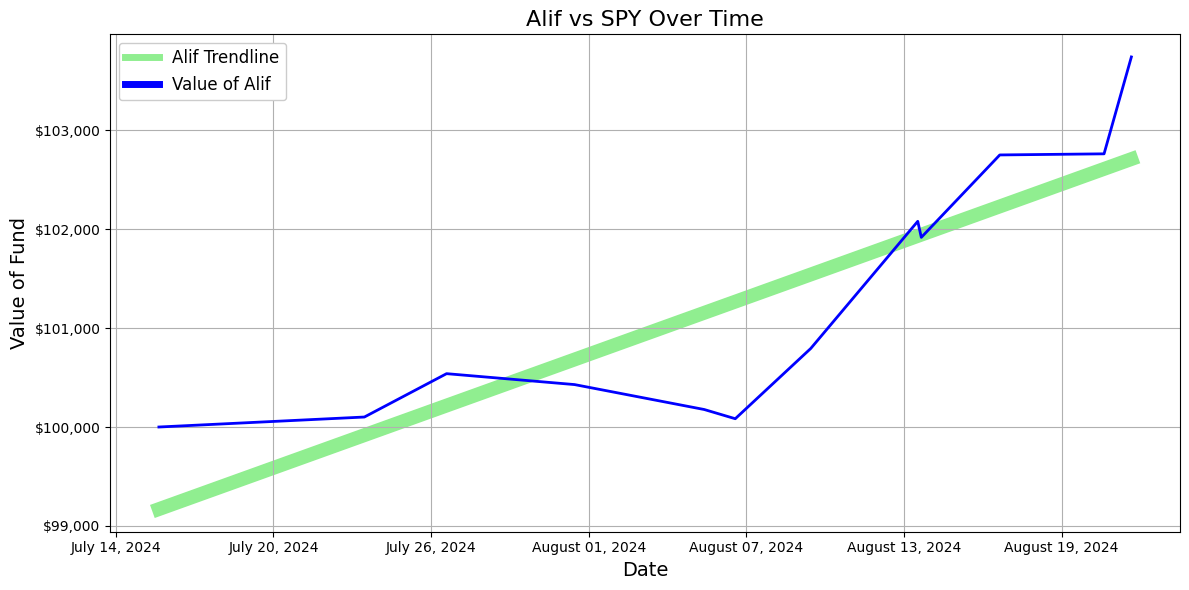

In [46]:
# Load the performance log
performance_log = pd.read_csv("Performance_Log.csv", parse_dates=["Action_Time"])

# Remove duplicate Action_Time entries
performance_log = performance_log.drop_duplicates(subset="Action_Time")

# Determine the number of points to plot
num_points = 12
indices = np.linspace(0, len(performance_log) - 1, num_points, dtype=int)

# Select the data at the calculated indices
selected_data = performance_log.iloc[indices]

# Plot the value of the fund over time
plt.figure(figsize=(12, 6))

# Calculate and plot the line of best fit (trend line) based on the selected data
x = date2num(selected_data["Action_Time"])
y = selected_data["Value_of_Fund"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the Portfolio Trend line under the Value of Fund line
plt.plot(selected_data["Action_Time"], p(x), color='lightgreen', linewidth=10, label='Alif Trendline', zorder=1)

# Enhancing the chart
plt.plot(selected_data["Action_Time"], selected_data["Value_of_Fund"], color='blue', linewidth=2, label='Value of Alif', zorder=2)

plt.title('Alif vs SPY Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value of Fund', fontsize=14)
plt.grid(True)

# Format the date on the x-axis to "Month Day, Year"
date_form = DateFormatter("%B %d, %Y")
plt.gca().xaxis.set_major_formatter(date_form)

# Format the y-axis with dollar signs and commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.0f}'))

# Set evenly spaced gridlines on x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=7))  # Adjust the number of gridlines on the x-axis

# Adding a legend with better display for the thick line
legend = plt.legend(loc='upper left', fontsize=12)
legend.get_frame().set_alpha(1)  # Make the legend background solid

# Adjust the thickness of the legend line
for legobj in legend.legendHandles:
    legobj.set_linewidth(5.0)

# Show the plot
plt.tight_layout()
plt.show()
